In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [3]:
from scipy import stats
from scipy.stats import norm

In [4]:
data = pd.read_csv('delivery_time.csv')

In [5]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


# Correlation Analysis

In [7]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

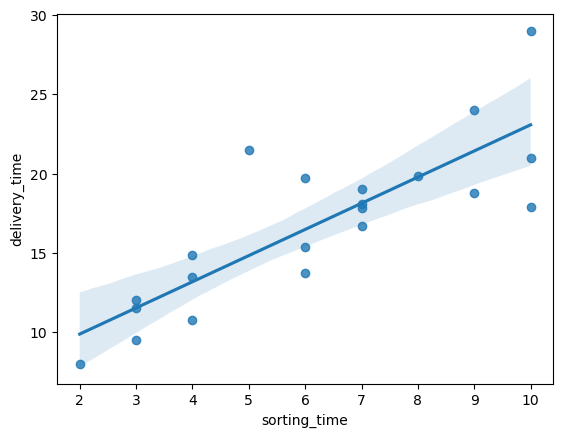

In [28]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

# EDA and data visualization

C:\Users\tambe\AppData\Local\Temp\ipykernel_8700\2217253749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

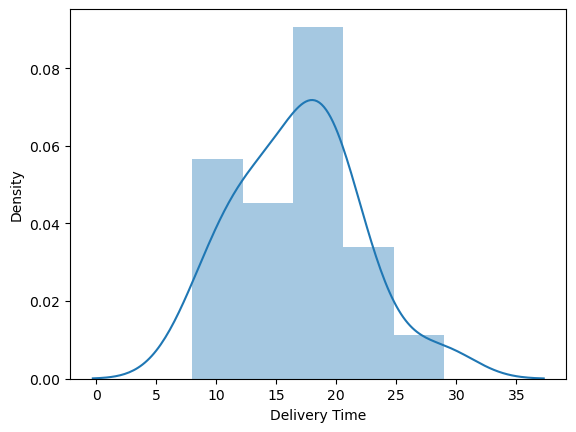

In [9]:
sns.distplot(data['Delivery Time'])

C:\Users\tambe\AppData\Local\Temp\ipykernel_8700\3932129489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

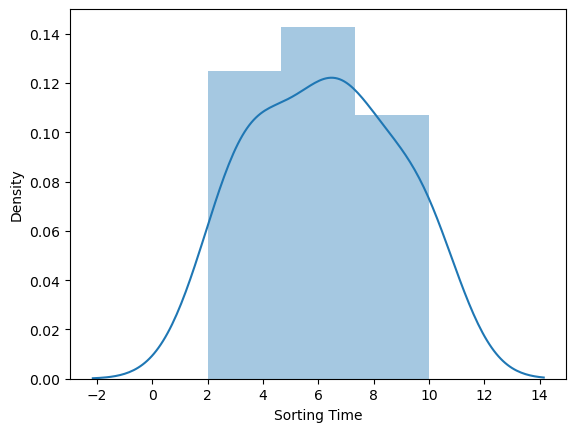

In [10]:
sns.distplot(data['Sorting Time'])

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [12]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Feature engineering

In [22]:
#Renaming the column

data = data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Model Building

In [23]:
#Fitting a regression model

import statsmodels.formula.api as smf
model = smf.ols('delivery_time~sorting_time', data = data).fit()


# Model Testing

In [25]:
#Extracting the coefficients

model.params   #params are nothing but β values

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [31]:
# Finding t-values and p-values

model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [30]:
#Finding R-squared values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model predictions


In [33]:
#Manual prediction of delivery_time for sorting time 5

delivery_time = (6.5827) + (1.6490) * (5)
delivery_time

14.8277

In [34]:
#Automatic prediction of delivery_time for sorting time 7,8

data_new = pd.Series([7,8])
data_new

0    7
1    8
dtype: int64

In [42]:
data_pred = pd.DataFrame(data_new,columns=['sorting_time'])
data_pred

,sorting_time
0,7
1,8


In [43]:
model.predict(data_pred)

0    18.125873
1    19.774893
dtype: float64